<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

# <center>Decision Trees</center>

In this lab exercise, you will learn a popular machine learning algorithm, Decision Tree. You will use this classification algorithm to build a model from historical data of patients, and their respond to different medications. Then you use the trained decision tree to predict the class of a unknown patient, or to find a proper drug for a new patient.

Import the Following Libraries:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>

In [9]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

### About dataset
Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to. 

It is a sample of binary classifier, and you can use the training part of the dataset 
to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.


__Did you know?__ When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)

now, read data using pandas dataframe:

In [10]:
df = pd.read_csv("dataset_hotel_bookings.csv", delimiter=",")
df.head()

C:\Users\gabri\AppData\Local\Temp\ipykernel_10668\2718845732.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset_hotel_bookings.csv", delimiter=",")


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,var_r,filter_$,arrival_month
0,1,0,342,2015,7,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,491,0,7
1,1,0,737,2015,7,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,737,0,7
2,1,0,7,2015,7,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,245,0,7
3,1,0,13,2015,7,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,245,0,7
4,1,0,14,2015,7,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,245,0,7


In [12]:
rows, columns = df.shape
total_elements = df.size
print("Number of rows:", rows)
print("Number of columns:", columns)
print("Total number of elements:", total_elements)

Number of rows: 119390
Number of columns: 35
Total number of elements: 4178650


## Pre-processing

Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>
<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>

    
    <li> <b> y </b> as the <b> response vector (target) </b> </li>


   
</ul>

Remove the column containing the target name since it doesn't contain numeric values.

In [13]:
X = df[['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month']].values
X[0:5]

array([[   1,  342, 2015,    7],
       [   1,  737, 2015,    7],
       [   1,    7, 2015,    7],
       [   1,   13, 2015,    7],
       [   1,   14, 2015,    7]], dtype=int64)

In [14]:
#Target variable
y = df["is_canceled"]
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

---
## Setting up the Decision Tree
We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [15]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

## Practice
Print the shape of X_trainset and y_trainset. Ensure that the dimensions match

In [16]:
# Printing the shape of X_trainset and y_trainset
print("Shape of X_trainset:", X_trainset.shape)
print("Shape of y_trainset:", y_trainset.shape)

# Ensuring that the number of rows in X_trainset matches the length of y_trainset
if X_trainset.shape[0] == y_trainset.shape[0]:
    print("The dimensions of X_trainset and y_trainset match.")
else:
    print("The dimensions of X_trainset and y_trainset do not match.")



Shape of X_trainset: (83573, 4)
Shape of y_trainset: (83573,)
The dimensions of X_trainset and y_trainset match.


Print the shape of X_testset and y_testset. Ensure that the dimensions match

In [17]:
# Printing the shape of X_testset and y_testset
print("Shape of X_testset:", X_testset.shape)
print("Shape of y_testset:", y_testset.shape)

# Ensuring that the number of rows in X_testset matches the length of y_testset
if X_testset.shape[0] == y_testset.shape[0]:
    print("The dimensions of X_testset and y_testset match.")
else:
    print("The dimensions of X_testset and y_testset do not match.")



Shape of X_testset: (35817, 4)
Shape of y_testset: (35817,)
The dimensions of X_testset and y_testset match.


## Modeling
We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.

In [18]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [19]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Prediction
Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.

In [20]:
predTree = drugTree.predict(X_testset)

print (predTree [0:5])
print (y_testset [0:5])

[0 0 0 0 0]
19775     0
3094      1
114767    0
45361     0
78057     0
Name: is_canceled, dtype: int64


## Evaluation
Next, let's import __metrics__ from sklearn and check the accuracy of our model.

In [21]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.671022140324427


__Accuracy classification score__ computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


## Practice 
Can you calculate the accuracy score without sklearn ?

In [22]:
#Compare each element of the prediction array with the corresponding element in the actual labels
correct_predictions = sum(predTree == y_testset)
#Count the number of times the predicted label matches the actual label
total_predictions = len(y_testset)
#Divide this count by the total number of predictions to get the accuracy
accuracy = correct_predictions / total_predictions

print("DecisionTrees's Accuracy:", accuracy)


DecisionTrees's Accuracy: 0.671022140324427


## Visualization
Lets visualize the tree

In [23]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

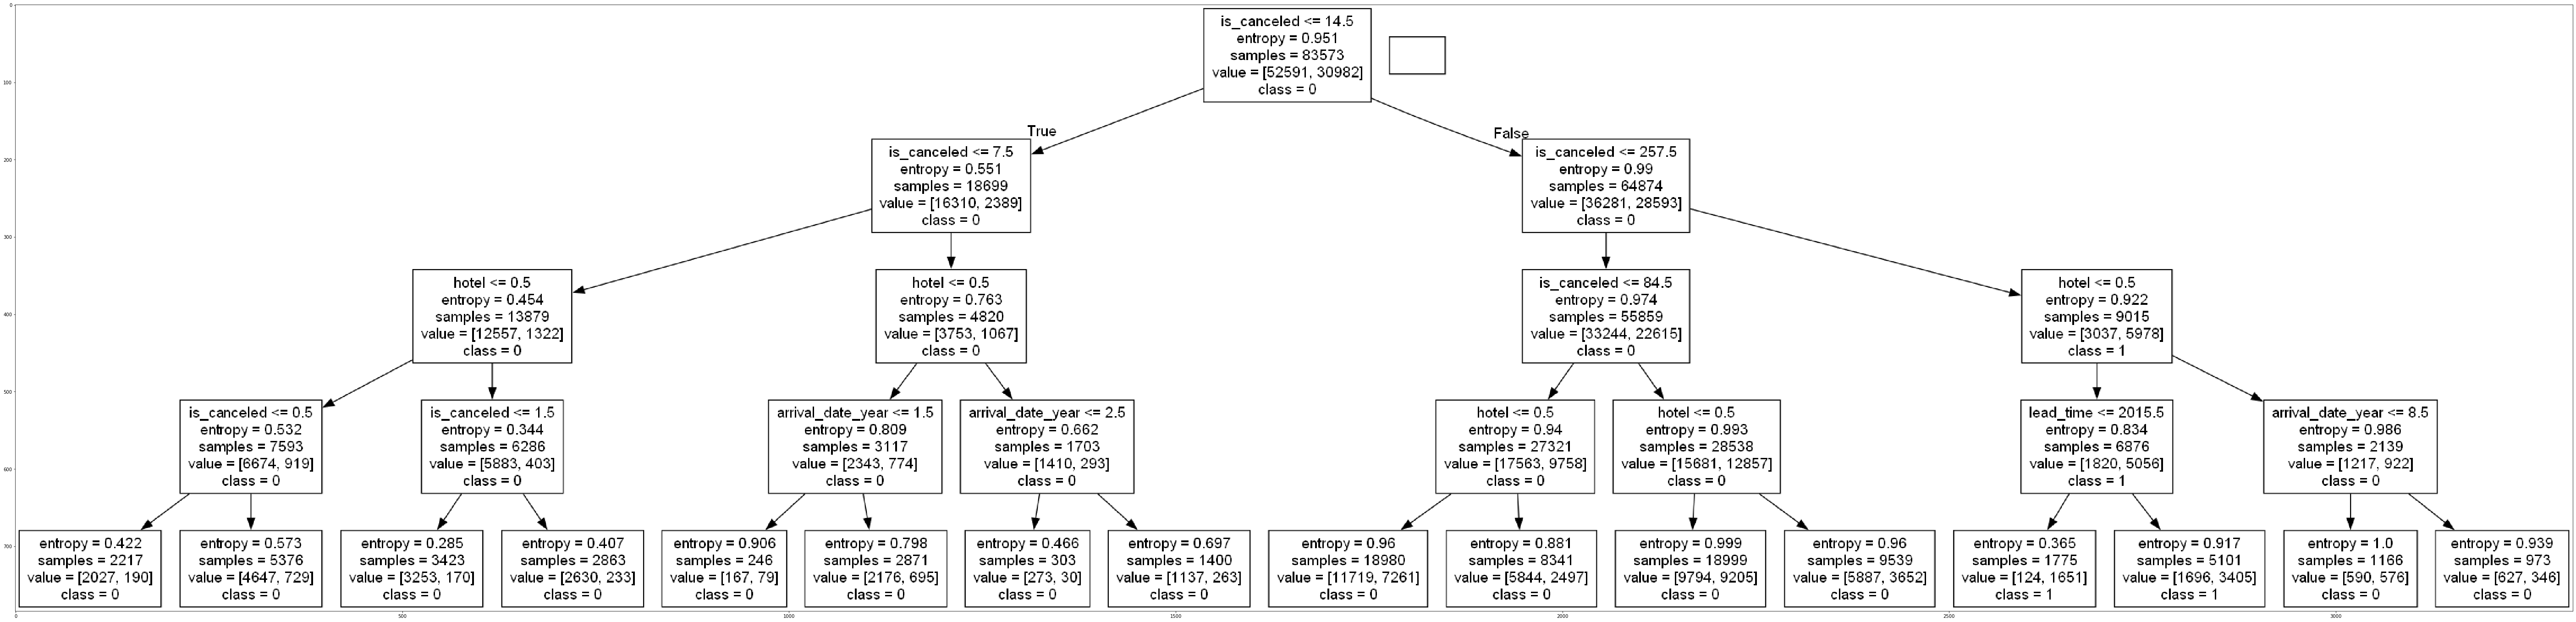

In [25]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:4].astype(str)
class_names = [str(name) for name in np.unique(y_trainset)]
targetNames = df["customer_type"].unique().tolist()
#Exports the decision tree model 
out = tree.export_graphviz(drugTree, feature_names=featureNames, out_file=dot_data, class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')